<h1>Градиентный спуск</h1>

Реализация градиентного спуска для вычисления параметров линейной регрессии между двумя переменными.

In [1]:
#импортирование библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline

In [2]:
#загрузка данных
#названия колонок
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
needed_columns = ['acceleration', 'horsepower']
data = pd.read_csv('data/auto-mpg.csv', names = columns)
#убираем пропущенные значения в "horsepower"
data = data[data.horsepower != '?'] 
#к-во значений в столбце
numOfInstance = data.shape[0]
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
#переводим данные из типа DataFrame в numpy array
data = data[needed_columns].as_matrix()

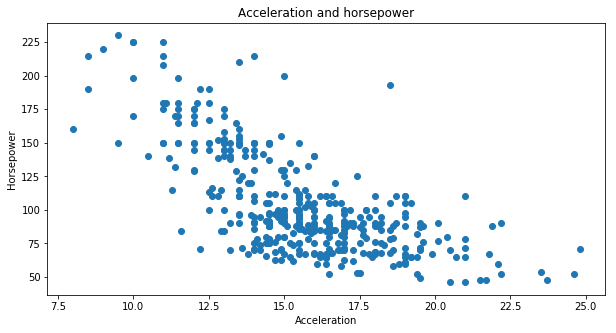

In [4]:
#отображаем данные
plt.figure(figsize=(10,5))
plt.title('Acceleration and horsepower')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('Acceleration')
plt.ylabel('Horsepower')
plt.show()

In [5]:
#считаем сумму квадратов ошибки
def SSE(m, b, data):
    totalError = 0.0
    for i in range(numOfInstance):
        acceleration = data[i,0]
        horsepower = float(data[i,1])
        realOutput = horsepower
        currentOutput = acceleration*m + b
        currentError = (realOutput - currentOutput)**2
        totalError += currentError
    sse = totalError / numOfInstance
    return totalError

In [6]:
def gradient_descent_step(m,b,data):
    
    score = 0.001 #скорость обучения
    
    N = numOfInstance
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #получение текущей пары значений
        x = data[i,0]
        y = float(data[i,1])

        #производная для рассчёта значения 'm'
        dm = -((2/N) * x * (y - (m*x + b)))
        
        #производная для рассчёта значения 'b'
        db = - ((2/N) * (y - (m*x + b)))
    
        #обновляем градиент
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Устанавливаем улучшенные значения 'm' и 'b'
    m_updated = m - score*m_grad
    b_updated = b - score*b_grad
    
    return m_updated,b_updated

In [7]:
#градиентный спуск
def gradient_descent_n_steps(m_starting,b_starting,data,steps):
    print('Стартовая линия: y = %.6fx + %.6f - Ошибка: %.6f\n' %(m_starting,b_starting,SSE(m_starting,b_starting,data)))
    m = m_starting
    b = b_starting
    display_freq = steps//10
    for i in range(steps):
        m,b = gradient_descent_step(m,b,data)
        if(i % display_freq == 0):
            sse = SSE(m,b,data)
            print('На шаге %d - Линия: y = %.6fx + %.6f - Ошибка: %.6f' %(i+1,m,b,sse))
    
    
    print('\nЛучшая линия: y = %.6fx + %.6f - Ошибка: %.6f' %(m,b,sse))
    return m,b

In [8]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 150000

In [9]:
m_best,b_best = gradient_descent_n_steps(M_STARTING,B_STARTING,data,NUM_STEPS)

Стартовая линия: y = 0.000000x + 0.000000 - Ошибка: 4857524.000000

На шаге 1 - Линия: y = 3.101185x + 0.208939 - Ошибка: 2017522.653292
На шаге 15001 - Линия: y = -3.253538x + 151.938286 - Ошибка: 428345.211372
На шаге 30001 - Линия: y = -7.056499x + 212.891666 - Ошибка: 324231.291034
На шаге 45001 - Линия: y = -8.586192x + 237.409377 - Ошибка: 307386.212029
На шаге 60001 - Линия: y = -9.201491x + 247.271310 - Ошибка: 304660.767768
На шаге 75001 - Линия: y = -9.448987x + 251.238145 - Ошибка: 304219.805370
На шаге 90001 - Линия: y = -9.548539x + 252.833754 - Ошибка: 304148.459998
На шаге 105001 - Линия: y = -9.588582x + 253.475566 - Ошибка: 304136.916696
На шаге 120001 - Линия: y = -9.604689x + 253.733727 - Ошибка: 304135.049051
На шаге 135001 - Линия: y = -9.611168x + 253.837569 - Ошибка: 304134.746876

Лучшая линия: y = -9.613774x + 253.879337 - Ошибка: 304134.746876


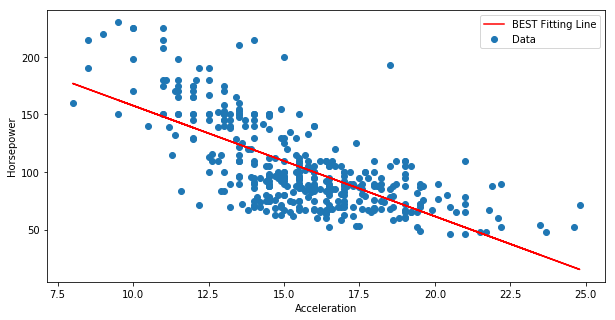

In [10]:
m=m_best
b=b_best
x = data[:,0]
#отображаем лучшую линию
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(x=x,y=data[:,1],label='Data')
plt.plot(x, m*x + b,color='red',label='BEST Fitting Line')
ax.set_xlabel('Acceleration')
ax.set_ylabel('Horsepower')
ax.legend(loc='best')

plt.show()